In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df = pd.read_csv("indexData.csv")
print(df.head())


  Index        Date        Open        High         Low       Close  \
0   NYA  1965-12-31  528.690002  528.690002  528.690002  528.690002   
1   NYA  1966-01-03  527.210022  527.210022  527.210022  527.210022   
2   NYA  1966-01-04  527.840027  527.840027  527.840027  527.840027   
3   NYA  1966-01-05  531.119995  531.119995  531.119995  531.119995   
4   NYA  1966-01-06  532.070007  532.070007  532.070007  532.070007   

    Adj Close  Volume  
0  528.690002     0.0  
1  527.210022     0.0  
2  527.840027     0.0  
3  531.119995     0.0  
4  532.070007     0.0  


In [5]:
# prompt: Convert Date Column & Set Index

import pandas as pd
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

print(df.head())


           Index        Open        High         Low       Close   Adj Close  \
Date                                                                           
1965-12-31   NYA  528.690002  528.690002  528.690002  528.690002  528.690002   
1966-01-03   NYA  527.210022  527.210022  527.210022  527.210022  527.210022   
1966-01-04   NYA  527.840027  527.840027  527.840027  527.840027  527.840027   
1966-01-05   NYA  531.119995  531.119995  531.119995  531.119995  531.119995   
1966-01-06   NYA  532.070007  532.070007  532.070007  532.070007  532.070007   

            Volume  
Date                
1965-12-31     0.0  
1966-01-03     0.0  
1966-01-04     0.0  
1966-01-05     0.0  
1966-01-06     0.0  


In [6]:
# prompt: Handle Missing Values

# Check for missing values
print(df.isnull().sum())

# Option 1: Drop rows with missing values
# df.dropna(inplace=True)

# Option 2: Fill missing values with a specific value (e.g., 0)
# df.fillna(0, inplace=True)

# Option 3: Fill missing values with the mean of the column
# df.fillna(df.mean(), inplace=True)

# Option 4: Forward fill missing values
# df.fillna(method='ffill', inplace=True)

# Option 5: Backward fill missing values
# df.fillna(method='bfill', inplace=True)

# Option 6: Interpolate missing values
df.interpolate(inplace=True)

# Check if missing values are handled
print(df.isnull().sum())

Index           0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64
Index        0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-6-1375006818>:22: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(inplace=True)


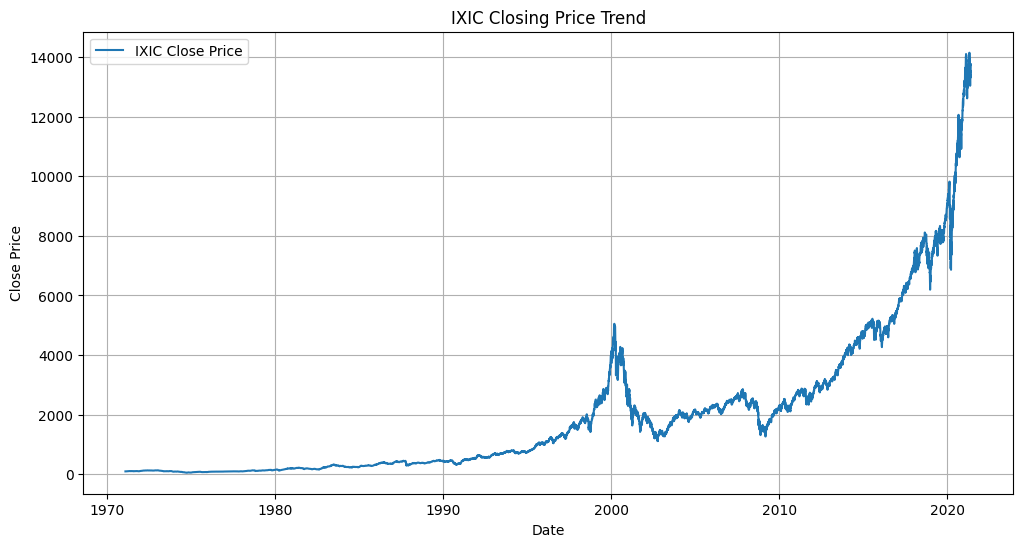

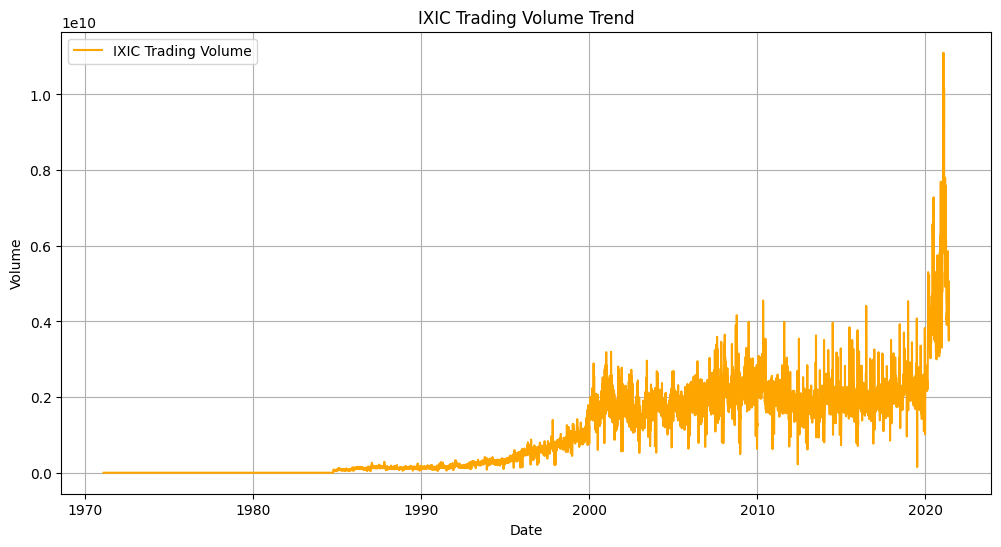

<ipython-input-7-655067053>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['MA50'] = df_index['Close'].rolling(window=50).mean()
<ipython-input-7-655067053>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['MA200'] = df_index['Close'].rolling(window=200).mean()


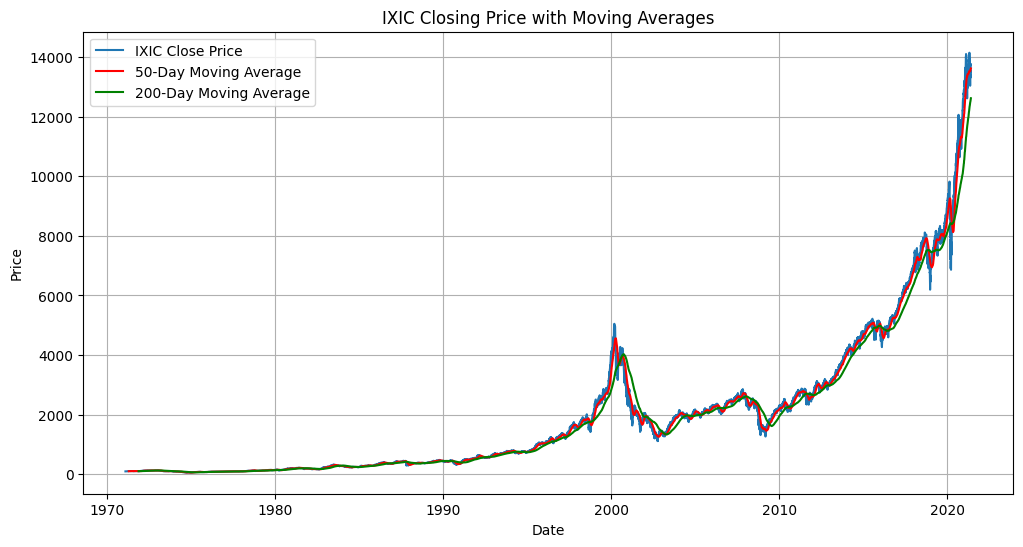

In [7]:
# prompt: Visualize Stock Trends

import matplotlib.pyplot as plt
# Select a specific stock index to visualize
stock_index = 'IXIC'  # Example: NASDAQ Composite

# Filter data for the selected stock index
df_index = df[df['Index'] == stock_index]

# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(df_index.index, df_index['Close'], label=f'{stock_index} Close Price')
plt.title(f'{stock_index} Closing Price Trend')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot the trading volume over time
plt.figure(figsize=(12, 6))
plt.plot(df_index.index, df_index['Volume'], label=f'{stock_index} Trading Volume', color='orange')
plt.title(f'{stock_index} Trading Volume Trend')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Plot closing price and moving averages
df_index['MA50'] = df_index['Close'].rolling(window=50).mean()
df_index['MA200'] = df_index['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df_index.index, df_index['Close'], label=f'{stock_index} Close Price')
plt.plot(df_index.index, df_index['MA50'], label='50-Day Moving Average', color='red')
plt.plot(df_index.index, df_index['MA200'], label='200-Day Moving Average', color='green')
plt.title(f'{stock_index} Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# prompt: Stationarity Check (ADF Test)

!pip install statsmodels
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the 'Close' price of the selected index
adf_test = adfuller(df_index['Close'])

# Print the results
print('ADF Statistic:', adf_test[0])
print('p-value:', adf_test[1])
print('Critical Values:', adf_test[4])

# Interpret the results
if adf_test[1] <= 0.05:
  print("Reject the null hypothesis (H0). The data is likely stationary.")
else:
  print("Fail to reject the null hypothesis (H0). The data is likely non-stationary.")

ADF Statistic: 5.226063217091624
p-value: 1.0
Critical Values: {'1%': np.float64(-3.430867127424327), '5%': np.float64(-2.861768544829758), '10%': np.float64(-2.5668916494378915)}
Fail to reject the null hypothesis (H0). The data is likely non-stationary.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                10152
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -47396.954
Date:                Sun, 15 Jun 2025   AIC                          94805.907
Time:                        08:25:14   BIC                          94849.259
Sample:                             0   HQIC                         94820.571
                              - 10152                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0017      0.003     -0.576      0.565      -0.008       0.004
ar.L2         -0.0467      0.003    -17.862      0.000      -0.052      -0.042
ar.L3         -0.0006      0.003     -0.212      0.8

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


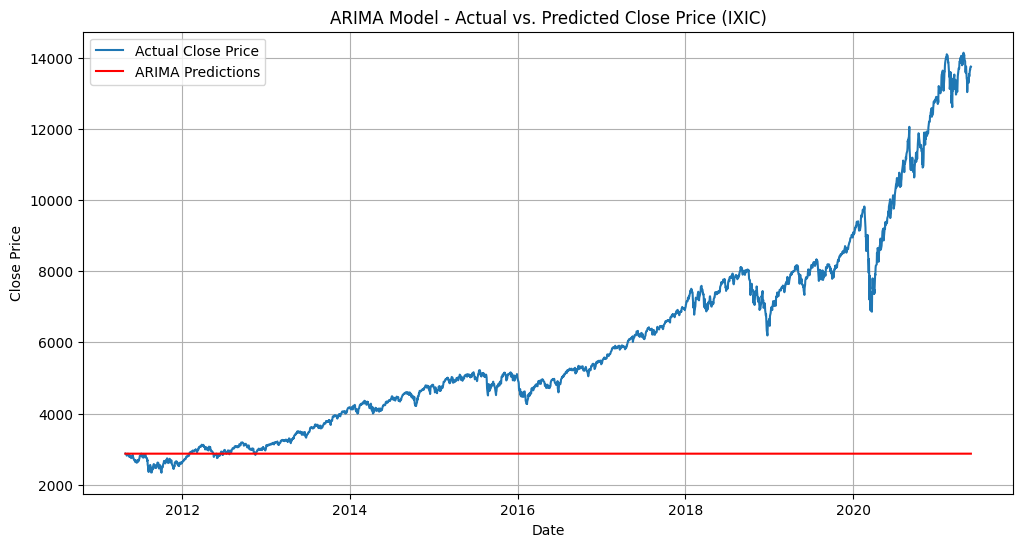

In [9]:
# prompt:  Apply ARIMA Model

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select the time series data for ARIMA
ts_data = df_index['Close']

# Split the data into training and testing sets
train_data, test_data = train_test_split(ts_data, test_size=0.2, shuffle=False)

# Define the ARIMA model parameters (p, d, q) - These need to be determined through analysis (ACF, PACF plots or auto_arima)
# For demonstration, let's use some initial values. You would typically optimize these.
p, d, q = 5, 1, 0  # Example values - tune based on your data

# Fit the ARIMA model
model = ARIMA(train_data, order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Make predictions on the test set
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f'RMSE: {rmse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Close Price')
plt.plot(test_data.index, predictions, label='ARIMA Predictions', color='red')
plt.title(f'ARIMA Model - Actual vs. Predicted Close Price ({stock_index})')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                10152
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -47350.917
Date:                            Sun, 15 Jun 2025   AIC                          94711.835
Time:                                    08:26:32   BIC                          94747.955
Sample:                                         0   HQIC                         94724.053
                                          - 10152                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7004      0.048     14.603      0.000       0.606       0.794
ma.L1         -0.7224      0.046   

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


SARIMA RMSE: 3710.145138897271


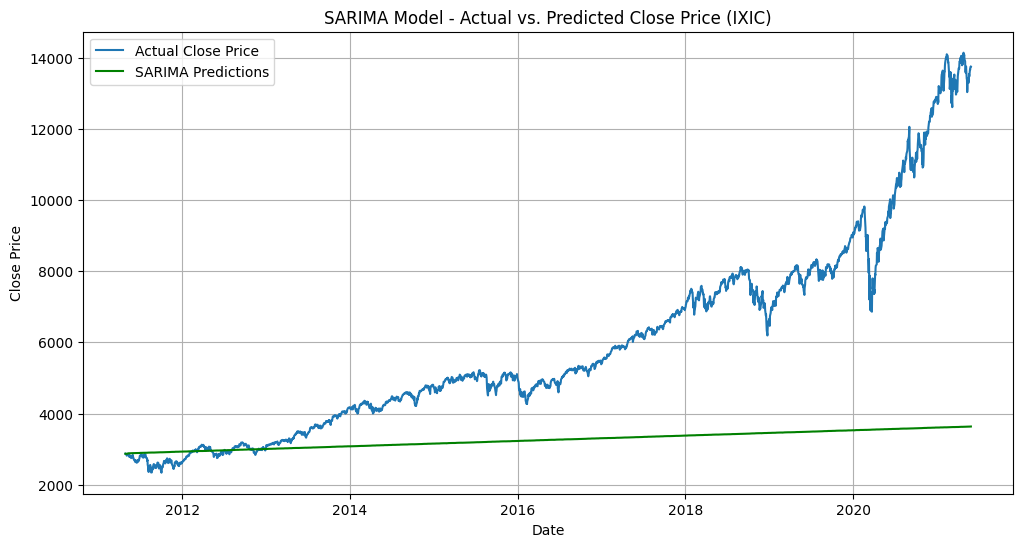

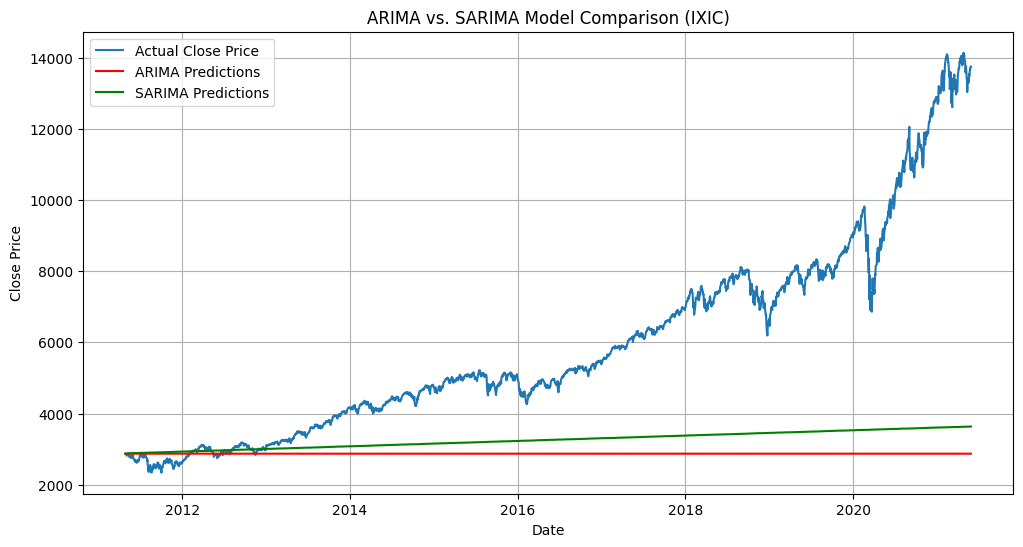

In [10]:
# prompt: Apply SARIMA Model

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters (p, d, q) and seasonal parameters (P, D, Q, S)
# These need to be determined through analysis (ACF, PACF plots, seasonal decomposition, or auto_arima)
# For demonstration, let's use some initial values. You would typically optimize these.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12  # Example seasonal period (S=12 for monthly data, adjust based on your data)

# Fit the SARIMA model
sarima_model = SARIMAX(train_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_model_fit = sarima_model.fit()

# Print the model summary
print(sarima_model_fit.summary())

# Make predictions on the test set
sarima_predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Evaluate the SARIMA model
sarima_rmse = np.sqrt(mean_squared_error(test_data, sarima_predictions))
print(f'SARIMA RMSE: {sarima_rmse}')

# Plot the actual vs. predicted values for SARIMA
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Close Price')
plt.plot(test_data.index, sarima_predictions, label='SARIMA Predictions', color='green')
plt.title(f'SARIMA Model - Actual vs. Predicted Close Price ({stock_index})')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, you can also plot the ARIMA predictions for comparison
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label='Actual Close Price')
plt.plot(test_data.index, predictions, label='ARIMA Predictions', color='red')
plt.plot(test_data.index, sarima_predictions, label='SARIMA Predictions', color='green')
plt.title(f'ARIMA vs. SARIMA Model Comparison ({stock_index})')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp43odketq/oh0prsme.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp43odketq/uwyzlzab.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55332', 'data', 'file=/tmp/tmp43odketq/oh0prsme.json', 'init=/tmp/tmp43odketq/uwyzlzab.json', 'output', 'file=/tmp/tmp43odketq/prophet_modeln1a829x7/prophet_model-20250615082733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:27:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:27:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


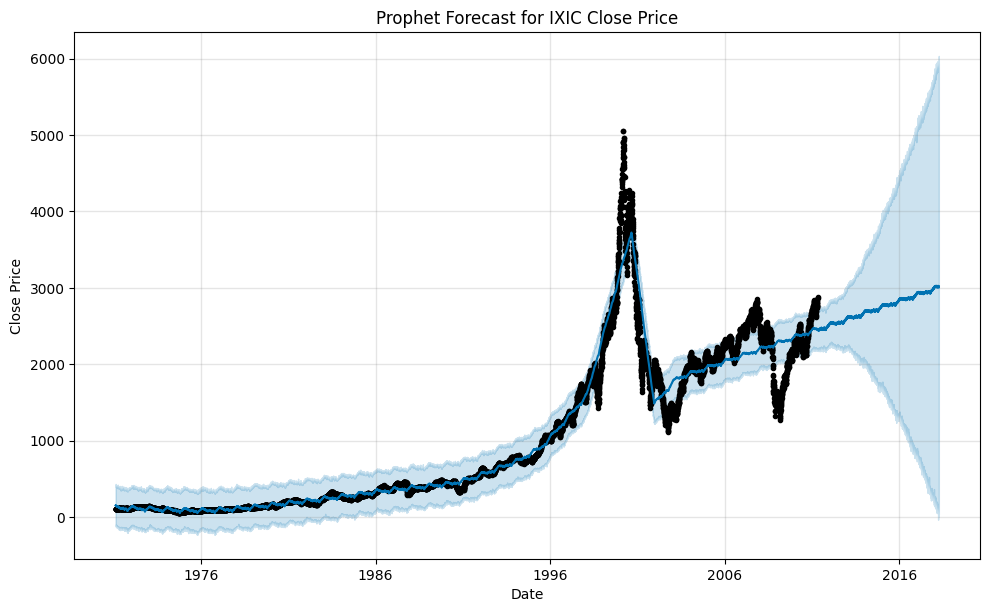

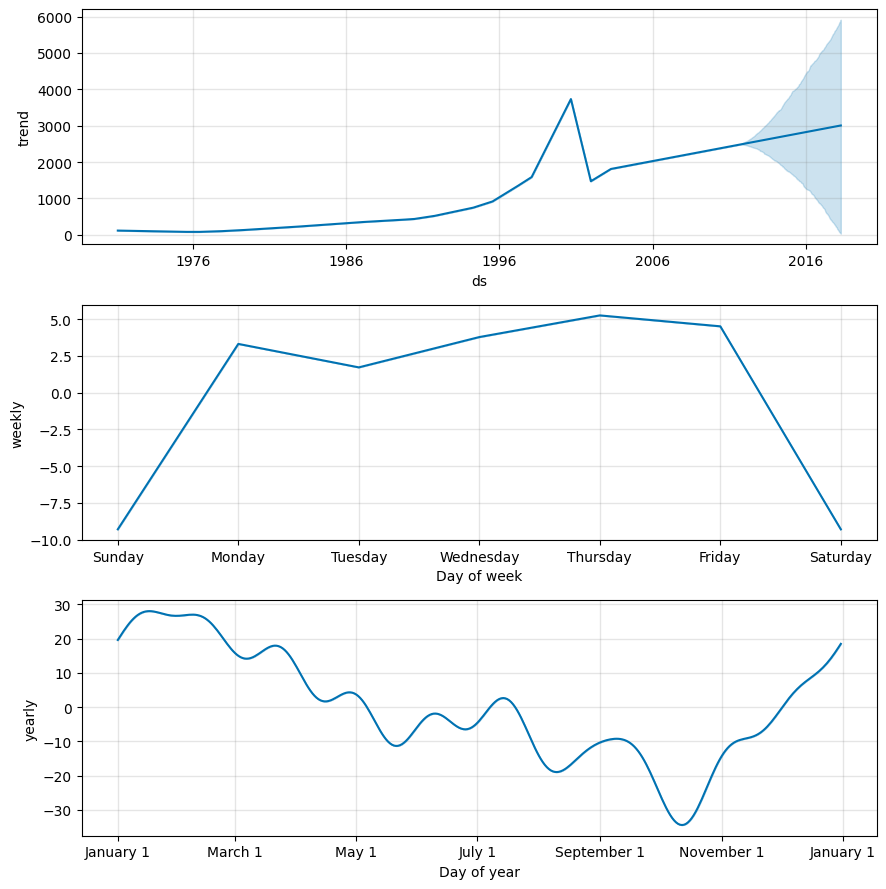

Prophet RMSE: 4140.272183622651


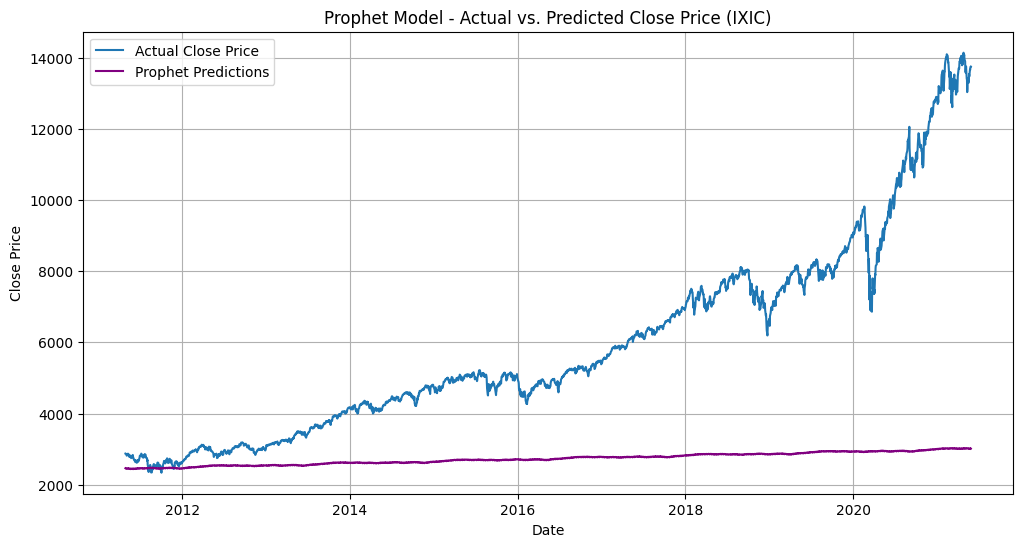

In [11]:
# prompt:  Apply Prophet Model

import matplotlib.pyplot as plt
import numpy as np
!pip install prophet
from prophet import Prophet

# Prepare the data for Prophet
# Prophet requires the dataframe to have two columns: 'ds' (datetime) and 'y' (value)
prophet_df = df_index[['Close']].reset_index()
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Split the data into training and testing sets for Prophet
# Prophet handles its own train/test splitting, but we can manually split for evaluation comparison
train_size = int(len(prophet_df) * 0.8)
prophet_train_data = prophet_df[:train_size]
prophet_test_data = prophet_df[train_size:]

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_train_data)

# Create a dataframe with future dates to make predictions
future = model.make_future_dataframe(periods=len(prophet_test_data), freq='D') # 'D' for daily frequency, adjust if needed

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig1 = model.plot(forecast)
plt.title(f'Prophet Forecast for {stock_index} Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Plot the components of the forecast
fig2 = model.plot_components(forecast)
plt.show()

# Extract the predictions for the test set period
prophet_predictions = forecast['yhat'][train_size:].values
actual_values = prophet_test_data['y'].values

# Evaluate the Prophet model
prophet_rmse = np.sqrt(mean_squared_error(actual_values, prophet_predictions))
print(f'Prophet RMSE: {prophet_rmse}')

# Plot the actual vs. predicted values for Prophet
plt.figure(figsize=(12, 6))
plt.plot(prophet_test_data['ds'], actual_values, label='Actual Close Price')
plt.plot(prophet_test_data['ds'], prophet_predictions, label='Prophet Predictions', color='purple')
plt.title(f'Prophet Model - Actual vs. Predicted Close Price ({stock_index})')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# prompt: Normalize Data for LSTM

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Select the columns for normalization (e.g., 'Open', 'High', 'Low', 'Close', 'Volume')
# You might want to exclude the 'Index' column as it's categorical
features_to_normalize = ['Open', 'High', 'Low', 'Close', 'Volume']

# Create a new DataFrame with only the selected features for the chosen stock index
df_lstm = df_index[features_to_normalize].copy()

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
df_lstm_scaled = scaler.fit_transform(df_lstm)

# Convert the scaled data back to a DataFrame with the original index and columns
df_lstm_scaled = pd.DataFrame(df_lstm_scaled, index=df_lstm.index, columns=features_to_normalize)

print("Normalized data for LSTM:")
print(df_lstm_scaled.head())

# You can now use `df_lstm_scaled` for your LSTM model training.
# Remember to save the scaler object if you need to inverse transform the predictions later.

Normalized data for LSTM:
                Open      High       Low     Close  Volume
Date                                                      
1971-02-05  0.003189  0.003188  0.003221  0.003204     0.0
1971-02-08  0.003249  0.003247  0.003281  0.003264     0.0
1971-02-09  0.003243  0.003242  0.003276  0.003258     0.0
1971-02-10  0.003238  0.003237  0.003271  0.003253     0.0
1971-02-11  0.003292  0.003290  0.003325  0.003307     0.0


In [13]:
# prompt: Create Time Series Data for LSTM

import numpy as np
def create_dataset(X, y, time_steps=1):
  Xs, ys = [], []
  for i in range(len(X) - time_steps):
    v = X.iloc[i:(i + time_steps)].values
    Xs.append(v)
    ys.append(y.iloc[i + time_steps])
  return np.array(Xs), np.array(ys)

# Define the number of time steps (look-back period)
TIME_STEPS = 10  # Example: Use the past 10 days to predict the next day

# Select the target variable (e.g., 'Close' price)
target = df_lstm_scaled['Close']

# Create the time series data
X, y = create_dataset(df_lstm_scaled, target, TIME_STEPS)

print(f'X shape: {X.shape}')  # Should be (number_of_samples, time_steps, number_of_features)
print(f'y shape: {y.shape}')  # Should be (number_of_samples,)

# Split the data into training and testing sets
# We need to ensure the temporal order is preserved, so shuffle=False
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# X_train and X_test are now ready to be used as input for an LSTM model.
# y_train and y_test are the corresponding target values.

X shape: (12680, 10, 5)
y shape: (12680,)
X_train shape: (10144, 10, 5)
y_train shape: (10144,)
X_test shape: (2536, 10, 5)
y_test shape: (2536,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 5.1370e-04 - val_loss: 2.4285e-05
Epoch 2/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 6.9043e-05 - val_loss: 2.1694e-05
Epoch 3/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 5.7450e-05 - val_loss: 2.2346e-05
Epoch 4/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 5.0450e-05 - val_loss: 1.7926e-05
Epoch 5/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 4.5526e-05 - val_loss: 1.0038e-04
Epoch 6/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 5.3682e-05 - val_loss: 2.1737e-05
Epoch 7/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 4.3580e-05 - val_loss: 5.8457e-05
Epoch 8/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 4.4982e-05 - val_loss: 3.7763e-05
Epoch 9/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - loss: 4.5132e-05 - val_loss: 3.3391e-05
Epoch 10/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 4.4963e-05 - val_loss: 6.2230e-05
Epoch 11/50
286/286 ━━━━━━━━━━━━━━━━━━━━ 7s 23m

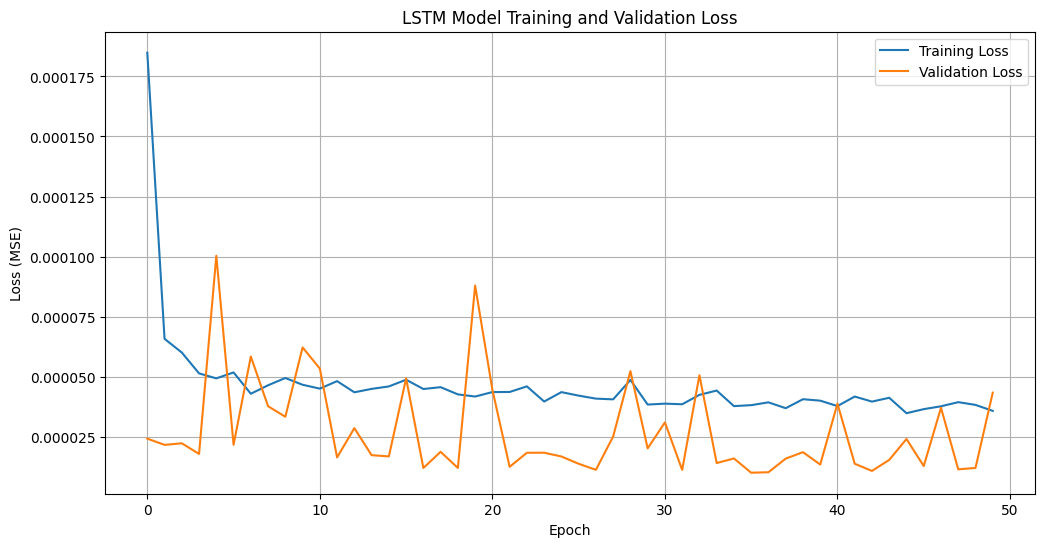

80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
LSTM RMSE (Original Scale): 770420948.7297003


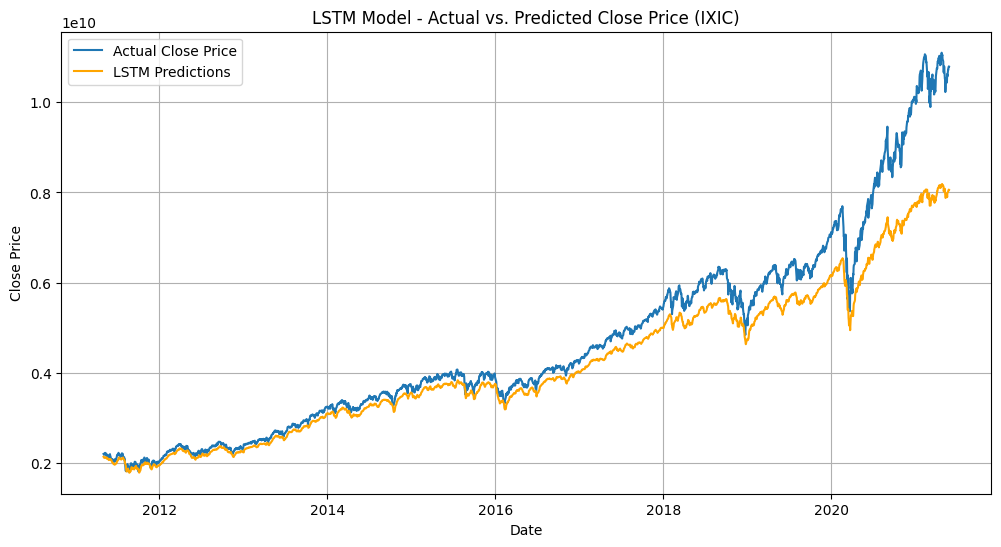

ARIMA RMSE: 4130.638055979779
SARIMA RMSE: 3710.145138897271
Prophet RMSE: 4140.272183622651
LSTM RMSE: 770420948.7297003


In [14]:
# prompt:  Build and Train LSTM Model

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()

# Add the first LSTM layer
# The input shape should be (time_steps, number_of_features)
# return_sequences=True is used when stacking multiple LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Add a second LSTM layer (optional, depends on model complexity)
# If this is the last LSTM layer, set return_sequences=False or omit it
model.add(LSTM(units=50))

# Add a Dropout layer
model.add(Dropout(0.2))

# Add the output layer
# Dense layer with 1 unit for predicting a single value (e.g., Close price)
model.add(Dense(units=1))

# Compile the model
# Use 'adam' optimizer and 'mean_squared_error' loss for regression tasks
model.compile(optimizer='adam', loss='mean_squared_error')

# Print the model summary
model.summary()


# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on the test data
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE): {loss}')

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Make predictions on the test data
lstm_predictions_scaled = model.predict(X_test)

# Inverse transform the scaled predictions and actual values back to original scale
# We need the original scaler object used for the 'Close' price feature
# Assuming 'Close' was the last feature in 'features_to_normalize' or you saved a specific scaler for it
# If you scaled multiple features together, you need to create a dummy array
# and inverse transform only the 'Close' column

# Assuming 'Close' is the last feature in 'features_to_normalize' (index 4)
# Create dummy arrays for inverse transformation
lstm_predictions = scaler.inverse_transform(np.concatenate((np.zeros((lstm_predictions_scaled.shape[0], scaler.n_features_in_ - 1)), lstm_predictions_scaled), axis=1))[:, -1]
y_test_original = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], scaler.n_features_in_ - 1)), y_test.reshape(-1, 1)), axis=1))[:, -1]


# Evaluate the model with original values
lstm_rmse = np.sqrt(mean_squared_error(y_test_original, lstm_predictions))
print(f'LSTM RMSE (Original Scale): {lstm_rmse}')

# Get the dates for the test set
test_dates = df_index.iloc[len(df_lstm_scaled) - len(y_test_original):].index

# Plot the actual vs. predicted values for LSTM
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_original, label='Actual Close Price')
plt.plot(test_dates, lstm_predictions, label='LSTM Predictions', color='orange')
plt.title(f'LSTM Model - Actual vs. Predicted Close Price ({stock_index})')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

# Compare RMSE with other models
print(f'ARIMA RMSE: {rmse}')
print(f'SARIMA RMSE: {sarima_rmse}')
print(f'Prophet RMSE: {prophet_rmse}')
print(f'LSTM RMSE: {lstm_rmse}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Close Price for the next day (original scale): 8077386102.705002


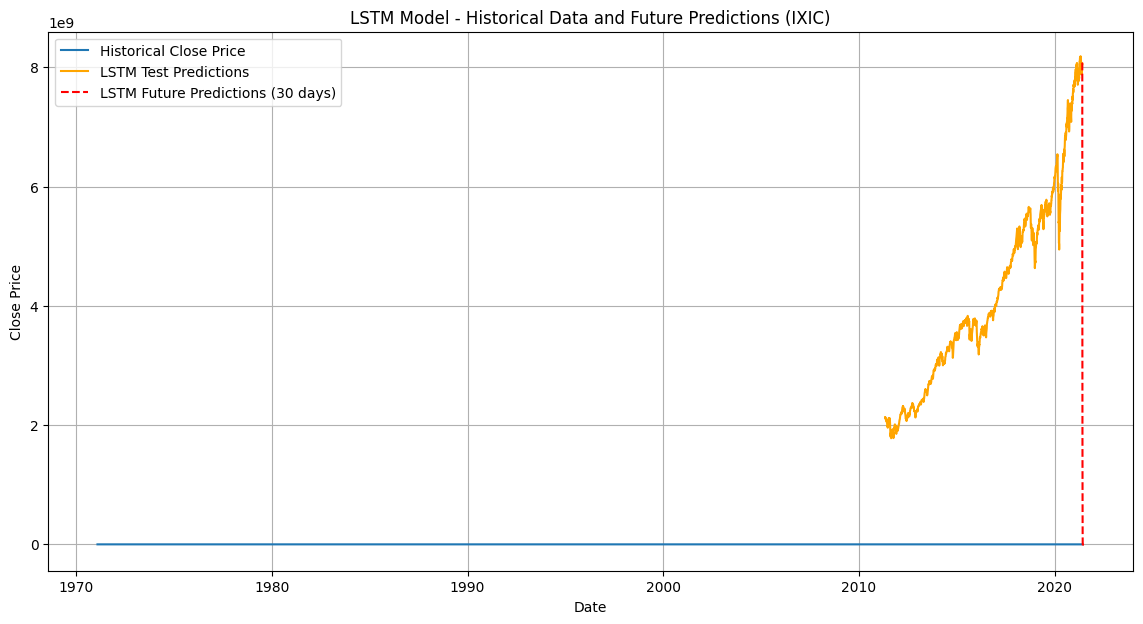

In [17]:
# prompt: Evaluate and Predict with LSTM

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# The previous code snippet has already trained and evaluated the LSTM model.
# The evaluation results (Test Loss and LSTM RMSE) are printed.
# The plot shows the actual vs. predicted Close prices for the test set using the LSTM model.

# To make predictions for future dates, you would typically:
# 1. Take the last `TIME_STEPS` data points from your scaled training data.
# 2. Reshape this data to match the input shape of the LSTM model.
# 3. Use the trained model to predict the next data point.
# 4. Append the prediction to your sequence and repeat the process for the desired number of future periods.
# 5. Remember to inverse transform the future predictions back to the original scale.

# Example of predicting the next few days:

# Get the last TIME_STEPS data points from the scaled data
last_train_data_scaled = df_lstm_scaled.iloc[-TIME_STEPS:].values

# Reshape the data to match the LSTM input shape (1, time_steps, number_of_features)
X_predict = last_train_data_scaled.reshape(1, TIME_STEPS, df_lstm_scaled.shape[1])

# Predict the next data point
predicted_next_day_scaled = model.predict(X_predict)

# Inverse transform the prediction back to the original scale
# Create a dummy array for inverse transformation
predicted_next_day_original = scaler.inverse_transform(np.concatenate((np.zeros((predicted_next_day_scaled.shape[0], scaler.n_features_in_ - 1)), predicted_next_day_scaled), axis=1))[:, -1]

print(f'Predicted Close Price for the next day (original scale): {predicted_next_day_original[0]}')

# To predict multiple future steps, you would loop and update the input sequence:

def predict_future(model, initial_sequence, num_future_steps, scaler, n_features):
  """
  Predicts future values using the trained LSTM model.

  Args:
    model: The trained Keras LSTM model.
    initial_sequence: The last TIME_STEPS of scaled data as a numpy array.
                      Shape: (1, TIME_STEPS, n_features).
    num_future_steps: The number of future time steps to predict.
    scaler: The MinMaxScaler object used for scaling.
    n_features: The number of features used in the model.

  Returns:
    A list of predicted future values in original scale.
  """
  future_predictions_scaled = []
  current_sequence = initial_sequence.copy()

  for _ in range(num_future_steps):
    # Predict the next value
    predicted_value_scaled = model.predict(current_sequence, verbose=0)

    # Append the predicted value to the predictions list
    future_predictions_scaled.append(predicted_value_scaled[0, 0])

    # Prepare the input for the next prediction
    # Remove the oldest data point and add the new prediction
    new_data_point = np.zeros((1, 1, n_features))
    # Assuming 'Close' is the last feature (index n_features - 1)
    new_data_point[0, 0, n_features - 1] = predicted_value_scaled[0, 0] # Add the predicted close price
    # You would need to make assumptions or use other models for other features if needed
    # For simplicity here, only the 'Close' price is carried forward in the prediction sequence

    current_sequence = np.concatenate((current_sequence[:, 1:, :], new_data_point), axis=1)

  # Inverse transform the future predictions
  future_predictions_original = scaler.inverse_transform(np.concatenate((np.zeros((len(future_predictions_scaled), n_features - 1)), np.array(future_predictions_scaled).reshape(-1, 1)), axis=1))[:, -1]

  return future_predictions_original

# Number of future days to predict
num_future_days = 30

# Get the initial sequence for prediction (last TIME_STEPS from the scaled data)
initial_sequence = df_lstm_scaled.iloc[-TIME_STEPS:][features_to_normalize].values.reshape(1, TIME_STEPS, len(features_to_normalize))

# Predict future close prices
future_lstm_predictions = predict_future(model, initial_sequence, num_future_days, scaler, len(features_to_normalize))

# Generate future dates for plotting
last_date = df_index.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_future_days, freq='D')

# Plot the historical data and the future predictions
plt.figure(figsize=(14, 7))
plt.plot(df_index.index, df_index['Close'], label='Historical Close Price')
plt.plot(test_dates, lstm_predictions, label='LSTM Test Predictions', color='orange') # Plot the test set predictions
plt.plot(future_dates, future_lstm_predictions, label=f'LSTM Future Predictions ({num_future_days} days)', color='red', linestyle='--')
plt.title(f'LSTM Model - Historical Data and Future Predictions ({stock_index})')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


--- Model Performance Comparison (RMSE) ---
ARIMA RMSE: 4130.64
SARIMA RMSE: 3710.15
Prophet RMSE: 4140.27
LSTM RMSE: 770420948.73


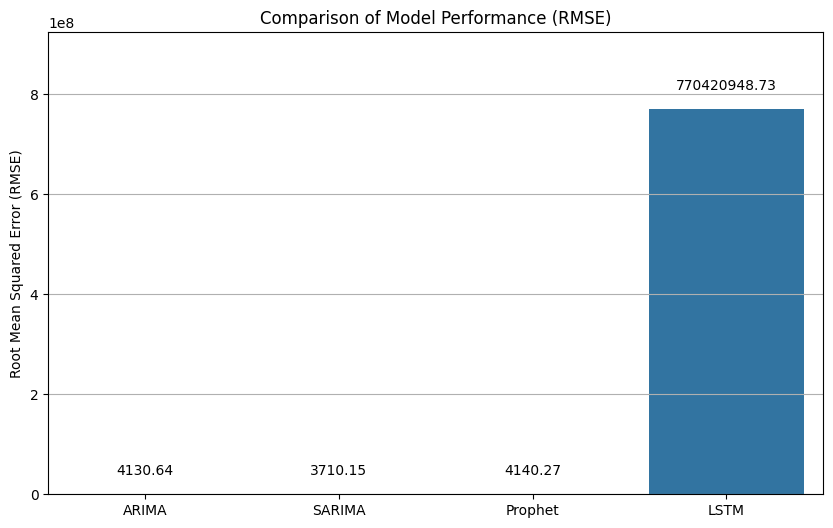

In [18]:
# prompt: Compare All Models

import matplotlib.pyplot as plt
# Summarize the RMSE for each model
print("\n--- Model Performance Comparison (RMSE) ---")
print(f'ARIMA RMSE: {rmse:.2f}')
print(f'SARIMA RMSE: {sarima_rmse:.2f}')
print(f'Prophet RMSE: {prophet_rmse:.2f}')
print(f'LSTM RMSE: {lstm_rmse:.2f}')

# Create a bar plot to visualize the RMSE comparison
models = ['ARIMA', 'SARIMA', 'Prophet', 'LSTM']
rmse_values = [rmse, sarima_rmse, prophet_rmse, lstm_rmse]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_values)
plt.title('Comparison of Model Performance (RMSE)')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.ylim(0, max(rmse_values) * 1.2) # Set y-axis limit for better visualization
plt.grid(axis='y')

# Add text labels for RMSE values on the bars
for i, v in enumerate(rmse_values):
  plt.text(i, v + 0.05 * max(rmse_values), f'{v:.2f}', ha='center')

plt.show()

# Discussion based on RMSE values:
# Lower RMSE indicates better model performance on the test data.
# Compare the RMSE values to see which model performed best for the selected stock index and time period.
# Keep in mind that these are just example runs with potentially non-optimized parameters.
# Further tuning of hyperparameters for each model would likely improve their performance.
# The best model can vary depending on the specific dataset and forecasting horizon.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p


ARIMA Forecast for the next 30 days:
12690    13747.848878
12691    13747.852778
12692    13747.994566
12693    13747.858165
12694    13747.908501
12695    13747.894689
12696    13747.897086
12697    13747.897750
12698    13747.897075
12699    13747.897401
12700    13747.897288
12701    13747.897313
12702    13747.897312
12703    13747.897309
12704    13747.897311
12705    13747.897310
12706    13747.897311
12707    13747.897311
12708    13747.897311
12709    13747.897311
12710    13747.897311
12711    13747.897311
12712    13747.897311
12713    13747.897311
12714    13747.897311
12715    13747.897311
12716    13747.897311
12717    13747.897311
12718    13747.897311
12719    13747.897311
Name: predicted_mean, dtype: float64


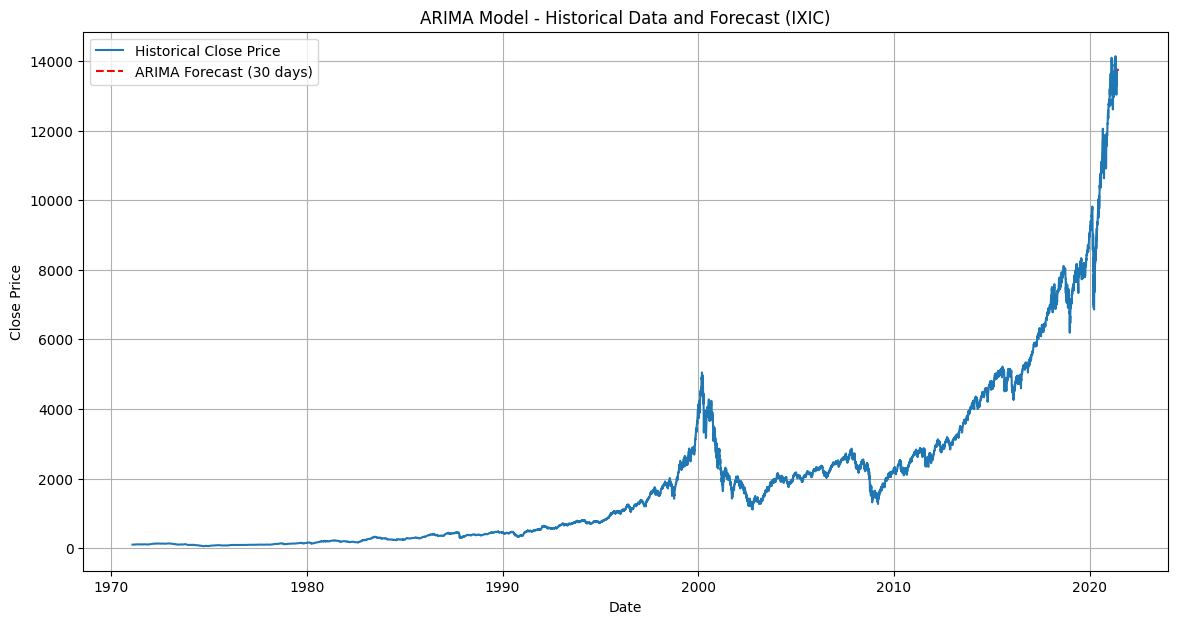

In [25]:
# prompt: ARIMA Forecast Prompt (30 days ahead)

import pandas as pd
import matplotlib.pyplot as plt
# Select the time series data for ARIMA
ts_data = df_index['Close']

# Define the ARIMA model parameters (p, d, q)
# These parameters should ideally be determined through ACF/PACF analysis or auto_arima
# For demonstration, let's use initial values.
# If your ADF test showed non-stationarity (p-value > 0.05), d should likely be at least 1.
# You might need to experiment with different p and q values.
p, d, q = 5, 1, 0  # Example values - tune based on your data

# Fit the ARIMA model on the entire dataset
model = ARIMA(ts_data, order=(p, d, q))
model_fit = model.fit()

# Number of future days to forecast
num_future_days = 30

# Forecast future values
forecast_result = model_fit.forecast(steps=num_future_days)

# Print the forecasted values
print(f'\nARIMA Forecast for the next {num_future_days} days:')
print(forecast_result)

# Generate future dates for plotting the forecast
last_date = ts_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=num_future_days, freq='D')

# Plot the historical data and the forecast
plt.figure(figsize=(14, 7))
plt.plot(ts_data.index, ts_data, label='Historical Close Price')
plt.plot(future_dates, forecast_result, label=f'ARIMA Forecast ({num_future_days} days)', color='red', linestyle='--')
plt.title(f'ARIMA Model - Historical Data and Forecast ({stock_index})')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp43odketq/jol4g0qo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp43odketq/tgtx1u3_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42646', 'data', 'file=/tmp/tmp43odketq/jol4g0qo.json', 'init=/tmp/tmp43odketq/tgtx1u3_.json', 'output', 'file=/tmp/tmp43odketq/prophet_modelw1_zpmdw/prophet_model-20250615084413.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:44:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:44:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


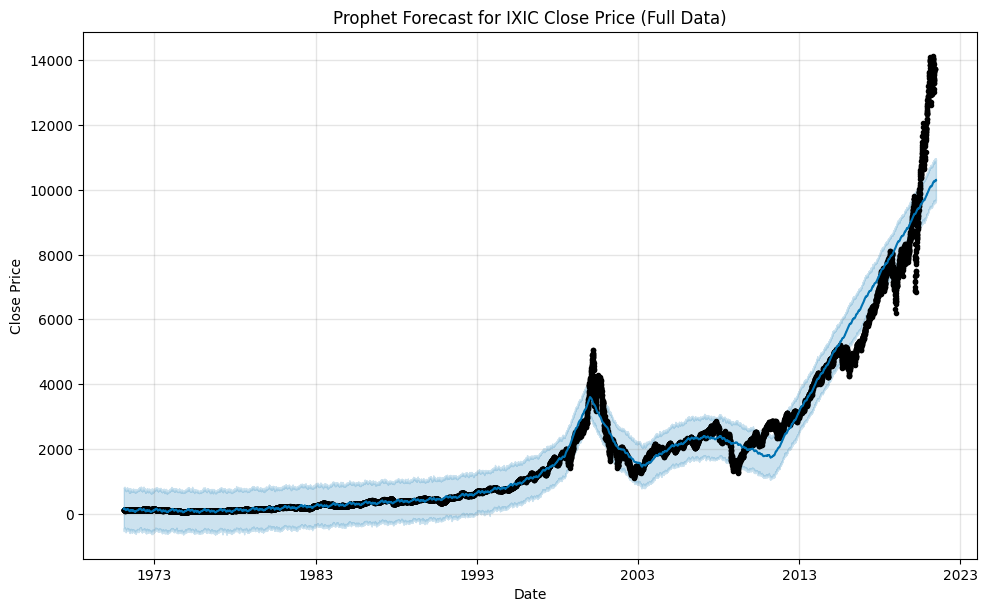

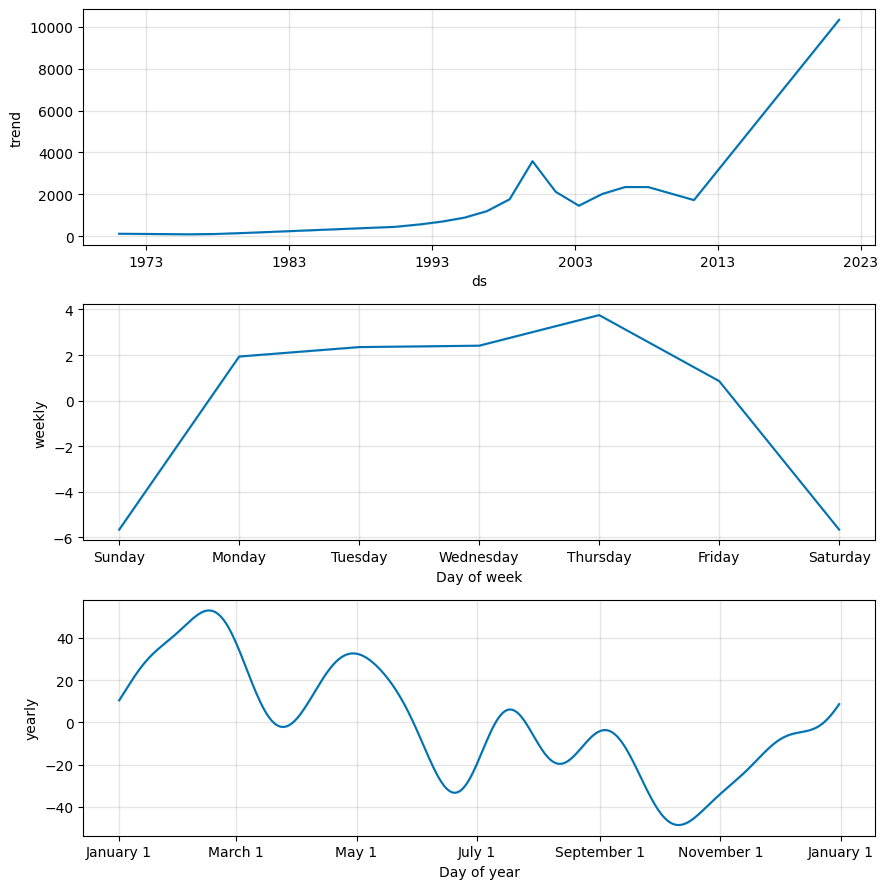


Prophet Forecast for the next 30 days:
         Date  Forecasted Close
0  2021-05-29      10269.193318
1  2021-05-30      10269.510001
2  2021-05-31      10277.373192
3  2021-06-01      10278.011325
4  2021-06-02      10278.264258
5  2021-06-03      10279.776201
6  2021-06-04      10277.042423
7  2021-06-05      10270.689508
8  2021-06-06      10270.876396
9  2021-06-07      10278.697344
10 2021-06-08      10279.390605
11 2021-06-09      10279.805001
12 2021-06-10      10281.592583
13 2021-06-11      10279.255080
14 2021-06-12      10273.423917
15 2021-06-13      10274.261045
16 2021-06-14      10282.861720
17 2021-06-15      10284.463035
18 2021-06-16      10285.910388
19 2021-06-17      10288.850078
20 2021-06-18      10287.775751
21 2021-06-19      10283.308443
22 2021-06-20      10285.597511
23 2021-06-21      10295.723539
24 2021-06-22      10298.907061
25 2021-06-23      10301.975262
26 2021-06-24      10306.554850
27 2021-06-25      10307.118811
28 2021-06-26      10304.266798


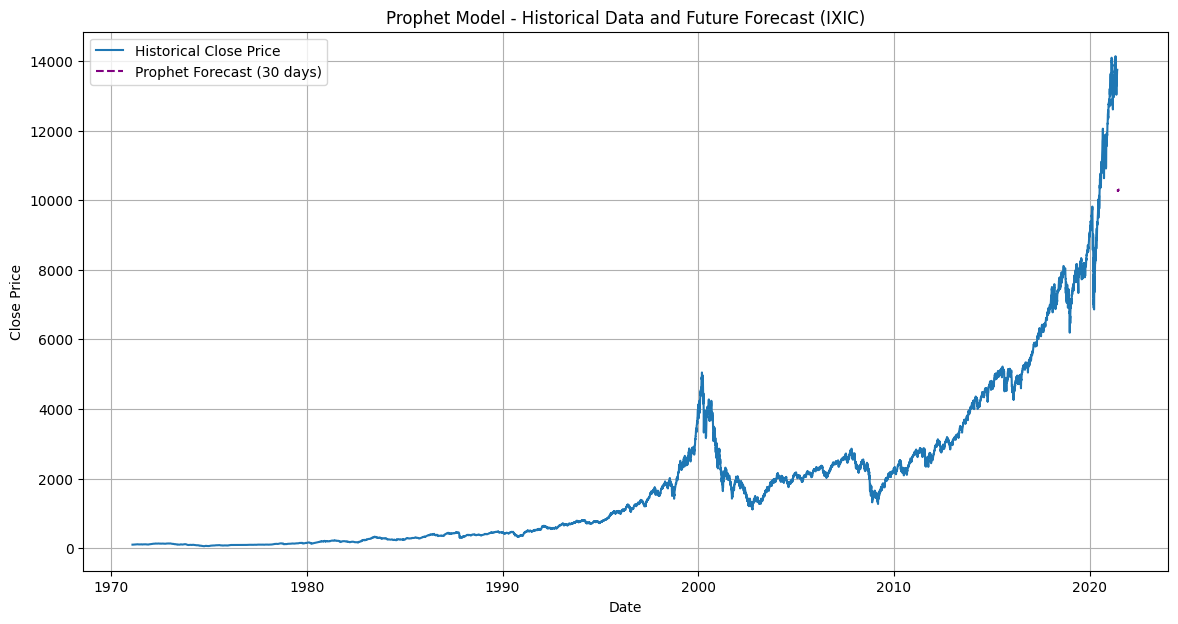

In [26]:
# prompt: Prophet Future Forecast

import pandas as pd
import matplotlib.pyplot as plt
# Prophet Future Forecast on the entire dataset

# Prepare the data for Prophet using the entire dataset
prophet_full_df = df_index[['Close']].reset_index()
prophet_full_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create and fit the Prophet model on the entire dataset
model_full = Prophet()
model_full.fit(prophet_full_df)

# Create a dataframe with future dates to make predictions
num_future_days_prophet = 30 # Specify the number of future days to forecast
future_full = model_full.make_future_dataframe(periods=num_future_days_prophet, freq='D') # 'D' for daily frequency, adjust if needed

# Make predictions on the future dates
forecast_full = model_full.predict(future_full)

# Plot the forecast
fig1_full = model_full.plot(forecast_full)
plt.title(f'Prophet Forecast for {stock_index} Close Price (Full Data)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

# Plot the components of the forecast
fig2_full = model_full.plot_components(forecast_full)
plt.show()

# Extract the forecasted values for the future period
future_prophet_forecast = forecast_full['yhat'][-num_future_days_prophet:].values

# Get the future dates for the forecast
future_prophet_dates = forecast_full['ds'][-num_future_days_prophet:].values

# Print the forecasted values
print(f'\nProphet Forecast for the next {num_future_days_prophet} days:')
print(pd.DataFrame({'Date': future_prophet_dates, 'Forecasted Close': future_prophet_forecast}))

# Plot the historical data and the future forecast from Prophet
plt.figure(figsize=(14, 7))
plt.plot(prophet_full_df['ds'], prophet_full_df['y'], label='Historical Close Price')
plt.plot(future_prophet_dates, future_prophet_forecast, label=f'Prophet Forecast ({num_future_days_prophet} days)', color='purple', linestyle='--')
plt.title(f'Prophet Model - Historical Data and Future Forecast ({stock_index})')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



SARIMA Forecast for the next 30 days:
12690    13750.595862
12691    13766.691850
12692    13765.200177
12693    13764.930750
12694    13764.343238
12695    13774.216561
12696    13772.483758
12697    13778.178898
12698    13779.766648
12699    13783.701794
12700    13785.405735
12701    13786.344781
12702    13789.073804
12703    13792.383947
12704    13793.507361
12705    13795.798305
12706    13795.460164
12707    13796.673354
12708    13797.360614
12709    13796.023164
12710    13797.827151
12711    13798.833160
12712    13800.668042
12713    13801.168198
12714    13803.930574
12715    13806.753867
12716    13807.976865
12717    13810.365285
12718    13810.036642
12719    13810.920104
Name: predicted_mean, dtype: float64


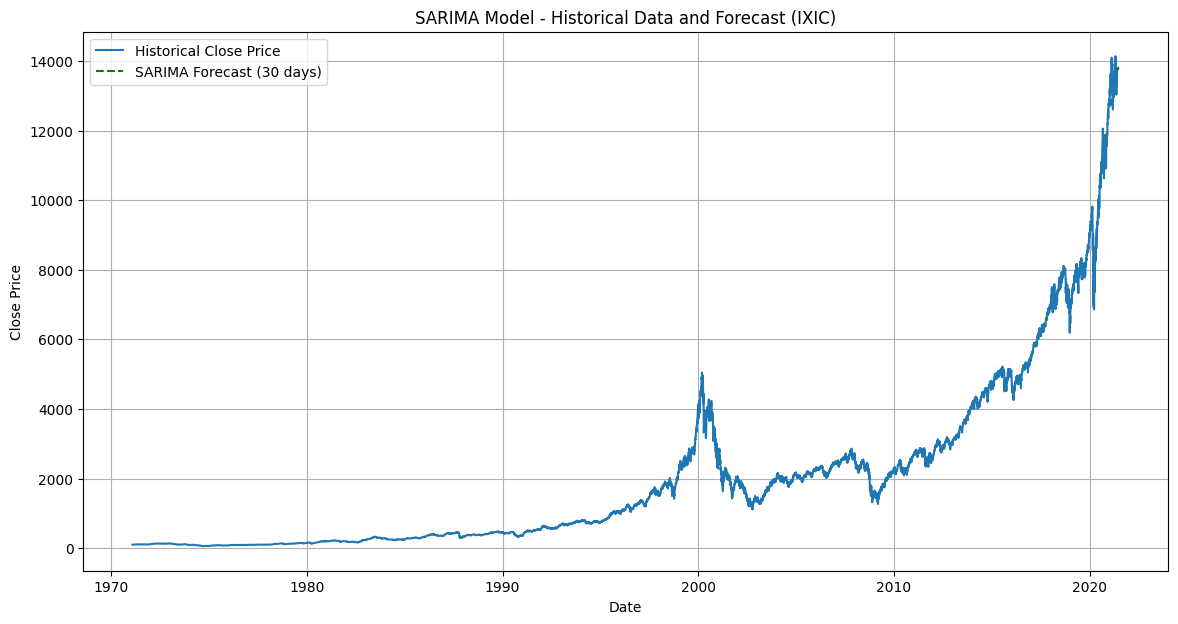

In [28]:
# prompt: LSTM Forecast Future

import pandas as pd
import matplotlib.pyplot as plt
# SARIMA Future Forecast on the entire dataset

# Select the time series data for SARIMA (using the entire dataset)
sarima_full_ts_data = df_index['Close']

# Define the SARIMA model parameters (p, d, q) and seasonal parameters (P, D, Q, S)
# These parameters should ideally be determined through analysis (ACF, PACF plots, seasonal decomposition, or auto_arima)
# For demonstration, using the same parameters as before.
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12  # Example seasonal period (S=12 for monthly data, adjust based on your data)

# Fit the SARIMA model on the entire dataset
sarima_full_model = SARIMAX(sarima_full_ts_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_full_model_fit = sarima_full_model.fit()

# Number of future days to forecast
num_future_days_sarima = 30 # Specify the number of future days to forecast

# Forecast future values
sarima_full_forecast = sarima_full_model_fit.forecast(steps=num_future_days_sarima)

# Print the forecasted values
print(f'\nSARIMA Forecast for the next {num_future_days_sarima} days:')
print(sarima_full_forecast)

# Generate future dates for plotting the forecast
last_date_sarima = sarima_full_ts_data.index[-1]
future_dates_sarima = pd.date_range(start=last_date_sarima + pd.Timedelta(days=1), periods=num_future_days_sarima, freq='D')

# Plot the historical data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(sarima_full_ts_data.index, sarima_full_ts_data, label='Historical Close Price')
plt.plot(future_dates_sarima, sarima_full_forecast, label=f'SARIMA Forecast ({num_future_days_sarima} days)', color='green', linestyle='--')
plt.title(f'SARIMA Model - Historical Data and Forecast ({stock_index})')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-29-1757063730>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['RSI'] = calculate_rsi(df_index['Close'])


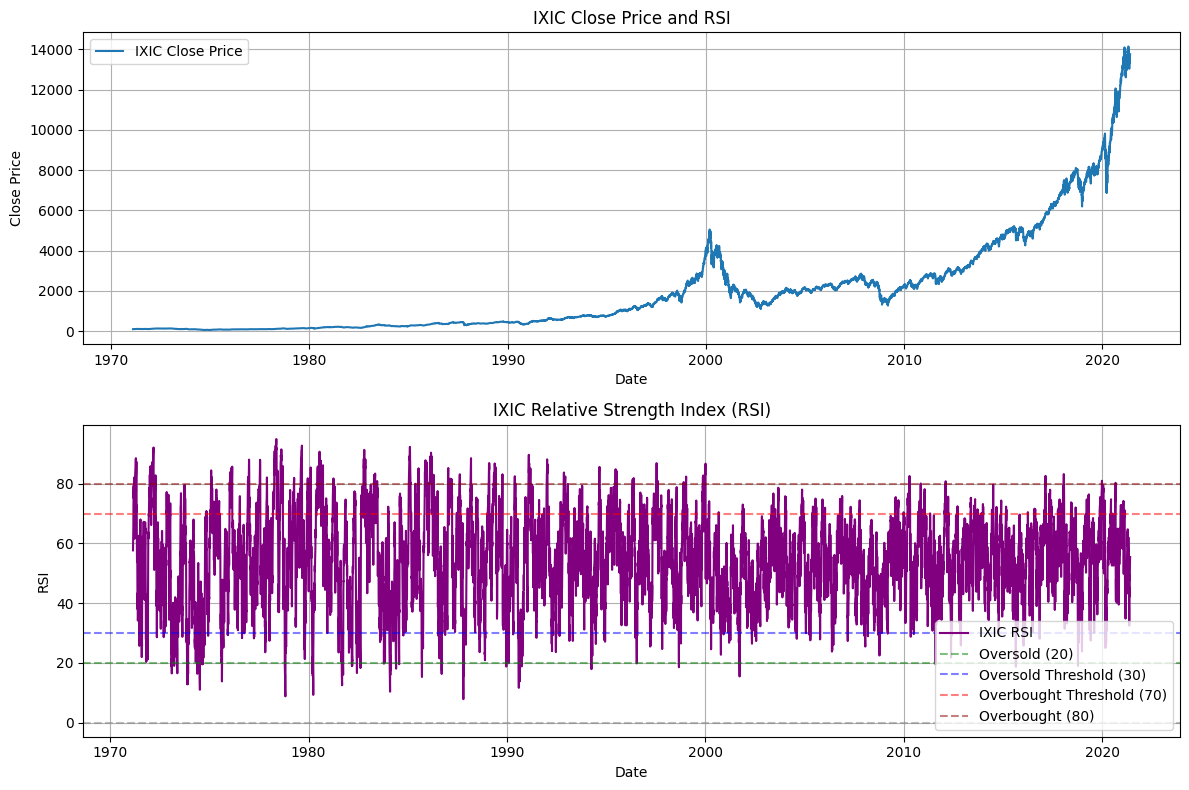

<ipython-input-29-1757063730>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['BB_Middle'], df_index['BB_Upper'], df_index['BB_Lower'] = calculate_bollinger_bands(df_index['Close'], window=window_bb, num_std_dev=num_std_dev_bb)
<ipython-input-29-1757063730>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_index['BB_Middle'], df_index['BB_Upper'], df_index['BB_Lower'] = calculate_bollinger_bands(df_index['Close'], window=window_bb, num_std_dev=num_std_dev_bb)
<ipython-input-29-1757063730>:59: 

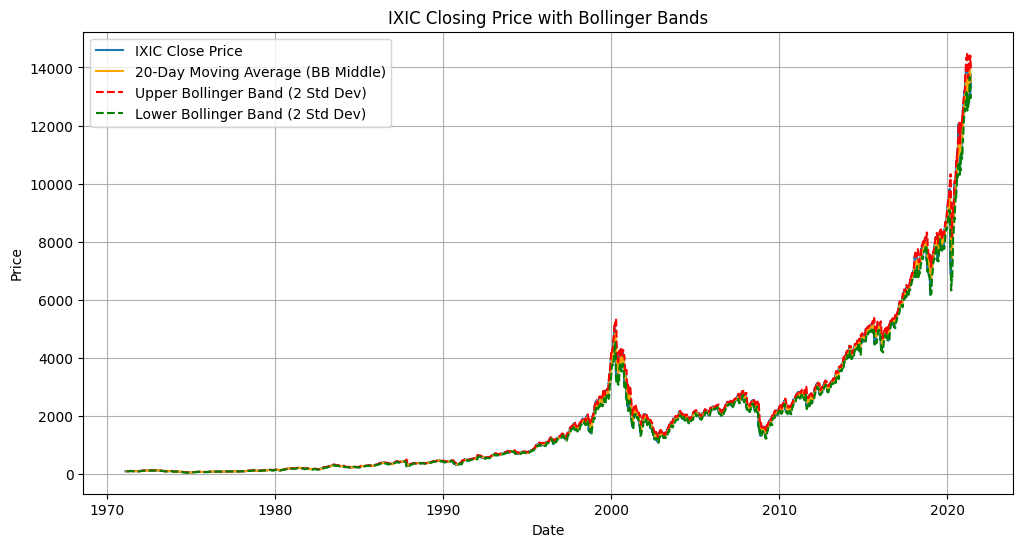

In [29]:
# prompt: Moving Average / RSI / Bollinger Bands

import matplotlib.pyplot as plt
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
  delta = data.diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)

  avg_gain = gain.ewm(com=window - 1, min_periods=window).mean()
  avg_loss = loss.ewm(com=window - 1, min_periods=window).mean()

  rs = avg_gain / avg_loss
  rsi = 100 - (100 / (1 + rs))
  return rsi

df_index['RSI'] = calculate_rsi(df_index['Close'])

# Plot Closing Price and RSI
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1) # 2 rows, 1 column, first plot
plt.plot(df_index.index, df_index['Close'], label=f'{stock_index} Close Price')
plt.title(f'{stock_index} Close Price and RSI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2) # 2 rows, 1 column, second plot
plt.plot(df_index.index, df_index['RSI'], label=f'{stock_index} RSI', color='purple')
plt.axhline(0, linestyle='--', alpha=0.5, color='gray')
plt.axhline(20, linestyle='--', alpha=0.5, color='green', label='Oversold (20)')
plt.axhline(30, linestyle='--', alpha=0.5, color='blue', label='Oversold Threshold (30)')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought Threshold (70)')
plt.axhline(80, linestyle='--', alpha=0.5, color='darkred', label='Overbought (80)')
plt.title(f'{stock_index} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()


# Calculate Bollinger Bands
def calculate_bollinger_bands(data, window=20, num_std_dev=2):
  rolling_mean = data.rolling(window=window).mean()
  rolling_std = data.rolling(window=window).std()

  upper_band = rolling_mean + (rolling_std * num_std_dev)
  lower_band = rolling_mean - (rolling_std * num_std_dev)
  return rolling_mean, upper_band, lower_band

window_bb = 20
num_std_dev_bb = 2

df_index['BB_Middle'], df_index['BB_Upper'], df_index['BB_Lower'] = calculate_bollinger_bands(df_index['Close'], window=window_bb, num_std_dev=num_std_dev_bb)

# Plot Closing Price and Bollinger Bands
plt.figure(figsize=(12, 6))
plt.plot(df_index.index, df_index['Close'], label=f'{stock_index} Close Price')
plt.plot(df_index.index, df_index['BB_Middle'], label=f'{window_bb}-Day Moving Average (BB Middle)', color='orange')
plt.plot(df_index.index, df_index['BB_Upper'], label=f'Upper Bollinger Band ({num_std_dev_bb} Std Dev)', color='red', linestyle='--')
plt.plot(df_index.index, df_index['BB_Lower'], label=f'Lower Bollinger Band ({num_std_dev_bb} Std Dev)', color='green', linestyle='--')
plt.fill_between(df_index.index, df_index['BB_Lower'], df_index['BB_Upper'], color='gray', alpha=0.1) # Shade the area between bands
plt.title(f'{stock_index} Closing Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Create a DataFrame to store the forecast results
forecast_df = pd.DataFrame({
    'ARIMA_Forecast': forecast_result,
    'Prophet_Forecast': future_prophet_forecast,
    'LSTM_Forecast': future_lstm_predictions
}, index=future_dates) # Assuming future_dates from ARIMA forecast is the same as Prophet/LSTM

# Save the dataframes to CSV
df.to_csv('cleaned_stock_data.csv')
forecast_df.to_csv('model_forecast.csv')